<a href="https://colab.research.google.com/github/prachimudholkar04/Twitter_sentimentanalysis_NLP/blob/main/NLP_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import json

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

RANDOM_SEED = 100

In [ ]:
!pip install --upgrade --q --no-cache-dir gdown

 

!gdown 14BkDp9i4ZBDSV-ZDTQ8rQVB9Ckh4mFfF 

Downloading...
From: https://drive.google.com/uc?id=14BkDp9i4ZBDSV-ZDTQ8rQVB9Ckh4mFfF
To: /content/train.csv
100% 1.50M/1.50M [00:00<00:00, 52.6MB/s]


In [ ]:
path = "/content/train.csv"
df = pd.read_csv(path)

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df.head()

,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [ ]:
df = df.drop("id",axis = 1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


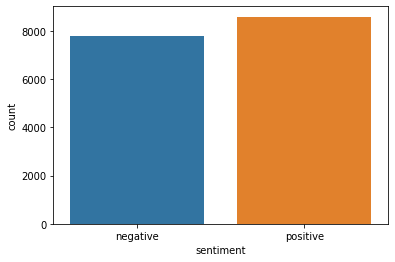

In [ ]:
sns.countplot(df["sentiment"])

In [ ]:
list_url = []

for i in df['text']:
  i = re.sub("(http./\w+)|(www\..\/\w+)", " ", i)
  
  list_url.append(i)

df['text'] = list_url

In [ ]:
list_url = []

for i in df['text']:
  i = re.sub(r"[!\"#$%&'()*+,-./:;<=>?@\^_`{|}~]+\ *", " ", i)
  
  list_url.append(i)

df['text'] = list_url

In [ ]:
list_url = []

for i in df['text']:
   i=re.sub('[^A-Za-z0-9 ]+'," ",i)
  
   list_url.append(i)

df['text'] = list_url

In [ ]:
list_url = []

for i in df['text']:
  i = re.sub(r'(.)\1+', r'\1',i)
  
  list_url.append(i)

df['text'] = list_url

In [ ]:
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenised_text = [word_tokenize(text) for text in df['text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df['Tokenised_Text'] = list_tokenised_sentences
df.head()

[['So', 'SAD', 'I', 'wil', 'mis', 'you', 'here', 'in', 'San', 'Diego'], ['my', 'bos', 'is', 'bulying', 'me']]
['So SAD I wil mis you here in San Diego', 'my bos is bulying me']


,text,sentiment,Tokenised_Text
0,So SAD I wil mis you here in San Diego,negative,So SAD I wil mis you here in San Diego
1,my bos is bulying me,negative,my bos is bulying me
2,what interview leave me alone,negative,what interview leave me alone
3,Sons of why couldn t they put them on the rel...,negative,Sons of why couldn t they put them on the rele...
4,2am fedings for the baby are fun when he is al...,positive,2am fedings for the baby are fun when he is al...


In [ ]:
wnl = WordNetLemmatizer()

list_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatised_sentences.append(lemma_sentence)
  
print(list_lemmatised_sentences[:2])

# add new column to data frame
df['Lemmatised_Text'] = list_lemmatised_sentences

df.head()

['So SAD I wil mi you here in San Diego', 'my bos is bulying me']


,text,sentiment,Tokenised_Text,Lemmatised_Text
0,So SAD I wil mis you here in San Diego,negative,So SAD I wil mis you here in San Diego,So SAD I wil mi you here in San Diego
1,my bos is bulying me,negative,my bos is bulying me,my bos is bulying me
2,what interview leave me alone,negative,what interview leave me alone,what interview leave me alone
3,Sons of why couldn t they put them on the rel...,negative,Sons of why couldn t they put them on the rele...,Sons of why couldn t they put them on the rele...
4,2am fedings for the baby are fun when he is al...,positive,2am fedings for the baby are fun when he is al...,2am fedings for the baby are fun when he is al...


In [ ]:

ps = PorterStemmer()

list_stemmed_sentences = []

for tokens in list_tokenised_text:
    stem_words = [ps.stem(word) for word in tokens]
    stem_sentence = ' '.join(stem_words)
    list_stemmed_sentences.append(stem_sentence)

print(list_stemmed_sentences[:2])

# # add new column to data frame
# df['Stemmed_Text'] = list_stemmed_sentences

df.head()
  

['so sad i wil mi you here in san diego', 'my bo is buli me']


,text,sentiment,Tokenised_Text,Lemmatised_Text
0,So SAD I wil mis you here in San Diego,negative,So SAD I wil mis you here in San Diego,So SAD I wil mi you here in San Diego
1,my bos is bulying me,negative,my bos is bulying me,my bos is bulying me
2,what interview leave me alone,negative,what interview leave me alone,what interview leave me alone
3,Sons of why couldn t they put them on the rel...,negative,Sons of why couldn t they put them on the rele...,Sons of why couldn t they put them on the rele...
4,2am fedings for the baby are fun when he is al...,positive,2am fedings for the baby are fun when he is al...,2am fedings for the baby are fun when he is al...


In [ ]:


df['Stemmed_Text'] = list_stemmed_sentences

df.head()

,text,sentiment,Tokenised_Text,Lemmatised_Text,Stemmed_Text
0,So SAD I wil mis you here in San Diego,negative,So SAD I wil mis you here in San Diego,So SAD I wil mi you here in San Diego,so sad i wil mi you here in san diego
1,my bos is bulying me,negative,my bos is bulying me,my bos is bulying me,my bo is buli me
2,what interview leave me alone,negative,what interview leave me alone,what interview leave me alone,what interview leav me alon
3,Sons of why couldn t they put them on the rel...,negative,Sons of why couldn t they put them on the rele...,Sons of why couldn t they put them on the rele...,son of whi couldn t they put them on the relea...
4,2am fedings for the baby are fun when he is al...,positive,2am fedings for the baby are fun when he is al...,2am fedings for the baby are fun when he is al...,2am fede for the babi are fun when he is al sm...


In [ ]:
df.to_csv('/content/preprocessed_file1.csv', index=False)

df.head()

,text,sentiment,Tokenised_Text,Lemmatised_Text,Stemmed_Text
0,So SAD I wil mis you here in San Diego,negative,So SAD I wil mis you here in San Diego,So SAD I wil mi you here in San Diego,so sad i wil mi you here in san diego
1,my bos is bulying me,negative,my bos is bulying me,my bos is bulying me,my bo is buli me
2,what interview leave me alone,negative,what interview leave me alone,what interview leave me alone,what interview leav me alon
3,Sons of why couldn t they put them on the rel...,negative,Sons of why couldn t they put them on the rele...,Sons of why couldn t they put them on the rele...,son of whi couldn t they put them on the relea...
4,2am fedings for the baby are fun when he is al...,positive,2am fedings for the baby are fun when he is al...,2am fedings for the baby are fun when he is al...,2am fede for the babi are fun when he is al sm...


In [ ]:
stopwords = ('whom', 'then', 'me', 'under', 'with', 'more', 'few', 'these', 'nor', 'an', "she's", 'd', 'o', 'who', "you've", 've', 'to', 'the', 'own', 'my', 'will', 'over', 't', 'yourselves', 'or', 'has', 'she', 'his', 'further', 'its', 'if', 'her', 'mightn', "should've", 'was', 'in', 'myself', 'did', 'on', 'about', 're', 'this', 'ourselves', 'any', 'same', 'too', 'how', 'himself', 'hers', 'him', "you'd", 'during', 'before', 'from', 'and', 'having', 'only', 'll', 'm', 'here', 's', 'which', 'below', 'between', 'should', 'their', 'yourself', 'out', 'until', 'them', 'when', 'because', 'but', 'be', 'herself', "you're", "it's", 'yours', 'ours', 'after', 'above', 'y', 'itself', 'had', 'themselves', 'why', 'each', 'there', 'am', 'for', 'you', 'that', 'have', 'once', 'been', 'i', 'as', 'again', 'where', 'up', "that'll", 'by', 'very', 'your', 'at', 'we', 'it', 'down', 'ma', 'against', 'of', 'some', 'all', 'those', 'he', 'does', 'they', 'theirs', 'just', 'into', 'a', 'now', 'most', 'our', 'are', 'than', "you'll", 'can', 'what', 'were', 'other', 'through', 'off', 'both', 'while', 'is', 'do', 'such', 'being', 'so', 'doing', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~')

In [ ]:

# use raw text
X_train_text, X_val_text, y_train_text, y_val_text = train_test_split(df['text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_text)}')
print(f'validation data set size: {len(X_val_text)}')

# use tokenised text
X_train_tokenised_text, X_val_tokenised_text, y_train_tokenised_text, y_val_tokenised_text = train_test_split(df['Tokenised_Text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_tokenised_text)}')
print(f'validation data set size: {len(X_val_tokenised_text)}')

# use lemmatised text
X_train_lemmatised_text, X_val_lemmatised_text, y_train_lemmatised_text, y_val_lemmatised_text = train_test_split(df['Lemmatised_Text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_lemmatised_text)}')
print(f'validation data set size: {len(X_val_lemmatised_text)}')

# use lemmatised text
X_train_Stemmed_Text, X_val_Stemmed_Text, y_train_Stemmed_Text, y_val_Stemmed_Text = train_test_split(df['Stemmed_Text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_Stemmed_Text)}')
print(f'validation data set size: {len(X_val_Stemmed_Text)}')

# define class_names to using with plot_confusion_matrix
class_list = ['positive', 'negative']

training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909


In [ ]:

# method to plot confusion matrix
def plot_confusion_matrix(matrix, class_names):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    s = [['TP','FN'], ['FP', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  return accuracy, confusion_matrix

In [ ]:

# method to train and predict using SVM classifier
def get_LogisticRegression_predictions(X_train, X_val, y_train, y_val, class_names):
  # build model
  clf = LogisticRegression(random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return clf
     

In [ ]:
def get_svm_predictions(X_train, X_val, y_train, y_val, class_names):
  # build model
  svc = svm.SVC(C=10, gamma = 1, kernel='rbf', random_state=RANDOM_SEED) 

 
  svc.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = svc.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return svc

Accuracy: 0.8816459564066002


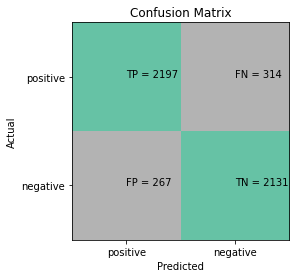

In [ ]:
count_vectorizer = CountVectorizer(stop_words= stopwords,ngram_range=(1,2))  # default: lowercase=True, ngram_range=(1,1)
count_vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = count_vectorizer.transform(X_train_text)
X_val = count_vectorizer.transform(X_val_text)

m = get_LogisticRegression_predictions(X_train, X_val, y_train_text, y_val_text, class_list)
     

Accuracy: 0.8718679975555103


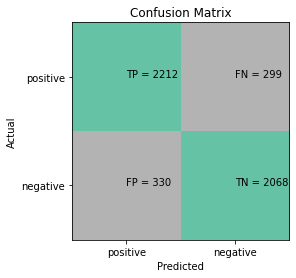

In [ ]:
tf_vectorizer = TfidfVectorizer(stop_words= stopwords, ngram_range=(1,2))  # default: lowercase=True, ngram_range=(1,1)
tf_vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = tf_vectorizer.transform(X_train_text)
X_val = tf_vectorizer.transform(X_val_text)

m1 = get_LogisticRegression_predictions(X_train, X_val, y_train_text, y_val_text, class_list)

Accuracy: 0.8718679975555103


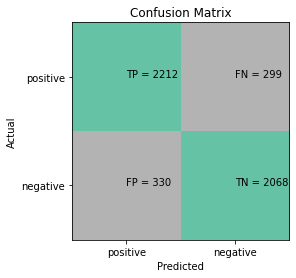

In [ ]:
tf_vectorizer = TfidfVectorizer(stop_words= stopwords, ngram_range=(1,2))  # default: lowercase=True, ngram_range=(1,1)
tf_vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = tf_vectorizer.transform(X_train_tokenised_text)
X_val = tf_vectorizer.transform(X_val_tokenised_text)

m2 = get_LogisticRegression_predictions(X_train, X_val, y_train_tokenised_text, y_val_tokenised_text, class_list)
     

Accuracy: 0.8718679975555103


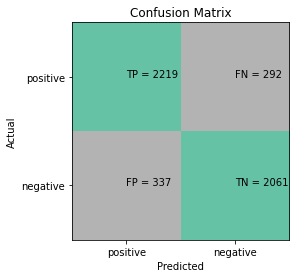

In [ ]:
tf_vectorizer = TfidfVectorizer(stop_words= stopwords, ngram_range=(1,2))  # default: lowercase=True, ngram_range=(1,1)
tf_vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = tf_vectorizer.transform(X_train_lemmatised_text)
X_val = tf_vectorizer.transform(X_val_lemmatised_text)

m3 = get_LogisticRegression_predictions(X_train, X_val, y_train_lemmatised_text, y_val_lemmatised_text, class_list)

Accuracy: 0.8747199022204115


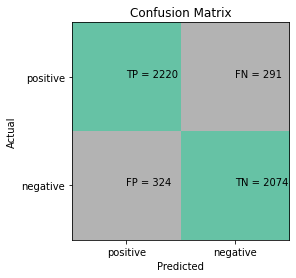

In [ ]:
tf_vectorizer = TfidfVectorizer(stop_words=stopwords)  # default: lowercase=True, ngram_range=(1,1)
tf_vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = tf_vectorizer.transform(X_train_tokenised_text)
X_val = tf_vectorizer.transform(X_val_tokenised_text)

m4 = get_svm_predictions(X_train, X_val, y_train_tokenised_text, y_val_tokenised_text, class_list)

Accuracy: 0.8718679975555103


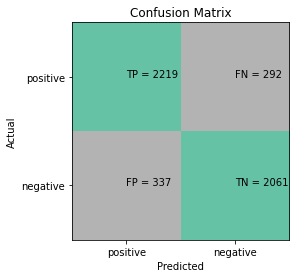

In [ ]:
tf_vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range=(1,2))  # default: lowercase=True, ngram_range=(1,1)
tf_vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = tf_vectorizer.transform(X_train_lemmatised_text)
X_val = tf_vectorizer.transform(X_val_lemmatised_text)

m5 = get_LogisticRegression_predictions(X_train, X_val, y_train_lemmatised_text, y_val_lemmatised_text, class_list)

Accuracy: 0.8783866367895702


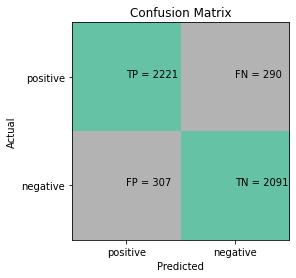

In [ ]:
tf_vectorizer = TfidfVectorizer(stop_words= stopwords,ngram_range=(1,2))  # default: lowercase=True, ngram_range=(1,1)
tf_vectorizer.fit(X_train_Stemmed_Text)

# convert train and test text data to numeric vectors
X_train = tf_vectorizer.transform(X_train_Stemmed_Text)
X_val = tf_vectorizer.transform(X_val_Stemmed_Text)

m6 = get_LogisticRegression_predictions(X_train, X_val, y_train_Stemmed_Text, y_val_Stemmed_Text, class_list)

Accuracy: 0.8857201059278875


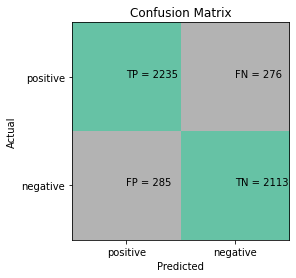

In [ ]:
m7 = get_svm_predictions(X_train, X_val, y_train_Stemmed_Text, y_val_Stemmed_Text, class_list)

In [ ]:
'''
#Defining the parameter grid
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel':['linear','poly','Sigmoid','rbf'],'random_state': [100]}


# instantiate the grid
grid = GridSearchCV(svm.SVC(), param_grid,refit=True,verbose=3)

# fit the grid with data
grid.fit(X_train, y_train)

# view the complete results
print(grid.best_params_)
print(grid.best_score_)
'''

"\n#Defining the parameter grid\nparam_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel':['linear','poly','Sigmoid','rbf'],'random_state': [100]}\n\n\n# instantiate the grid\ngrid = GridSearchCV(svm.SVC(), param_grid,refit=True,verbose=3)\n\n# fit the grid with data\ngrid.fit(X_train, y_train)\n\n# view the complete results\nprint(grid.best_params_)\nprint(grid.best_score_)\n"

# Logicstic Regression

In [ ]:
'''
params_grid = {'penalty': ['l1', 'l2'], 
               'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'class_weight': [None, 'balanced']
               }

# use gridsearch to test all values
lr_gridsearch = GridSearchCV(LogisticRegression(), params_grid, cv=5)

# fit model to data
lr_gridsearch.fit(X_train,y_train)

# print best parameter after tuning 
print(lr_gridsearch.best_params_)
print(grid.best_score_)
'''

"\nparams_grid = {'penalty': ['l1', 'l2'], \n               'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],\n               'class_weight': [None, 'balanced']\n               }\n\n# use gridsearch to test all values\nlr_gridsearch = GridSearchCV(LogisticRegression(), params_grid, cv=5)\n\n# fit model to data\nlr_gridsearch.fit(X_train,y_train)\n\n# print best parameter after tuning \nprint(lr_gridsearch.best_params_)\nprint(grid.best_score_)\n"

## Predictions

In [ ]:
!pip install --upgrade --q --no-cache-dir gdown

 

!gdown 1kEoS-sVAmz7ySK5XijeCVhSa0wpDZcH5


Downloading...
From: https://drive.google.com/uc?id=1kEoS-sVAmz7ySK5XijeCVhSa0wpDZcH5
To: /content/test (1).csv
100% 80.4k/80.4k [00:00<00:00, 60.0MB/s]


In [ ]:
test_review = "/content/test (1).csv"
df_test = pd.read_csv(test_review)

In [ ]:
df_test.head()

,id,text
0,96d74cb729,Shanghai is also really exciting (precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to..."
2,01082688c6,happy bday!
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!
4,726e501993,that`s great!! weee!! visitors!


In [ ]:
# df_test = df_test.drop("id",axis = 1)

In [ ]:
list_url = []

for i in df_test['text']:
  i = re.sub("(http./\w+)|(www\..\/\w+)", " ", i)
  
  list_url.append(i)

df_test['text'] = list_url

In [ ]:
list_url = []

for i in df_test['text']:
  i = re.sub(r"[!\"#$%&'()*+,-./:;<=>?@\^_`{|}~]+\ *", " ", i)
  
  list_url.append(i)

df_test['text'] = list_url

In [ ]:
list_url = []

for i in df_test['text']:
   i=re.sub('[^A-Za-z0-9 ]+'," ",i)
  
   list_url.append(i)

df_test['text'] = list_url

In [ ]:
list_url = []

for i in df_test['text']:
  i = re.sub(r'(.)\1+', r'\1',i)
  
  list_url.append(i)

df_test['text'] = list_url

In [ ]:
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenised_text = [word_tokenize(text) for text in df_test['text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df_test['text'] = list_tokenised_sentences
df_test.head()

[['Shanghai', 'is', 'also', 'realy', 'exciting', 'precisely', 'skyscrapers', 'galore', 'God', 'tweps', 'in', 'China', 'SH', 'BJ'], ['Recesion', 'hit', 'Veronique', 'Branquinho', 'she', 'has', 'to', 'quit', 'her', 'company', 'such', 'a', 'shame']]
['Shanghai is also realy exciting precisely skyscrapers galore God tweps in China SH BJ', 'Recesion hit Veronique Branquinho she has to quit her company such a shame']


,id,text
0,96d74cb729,Shanghai is also realy exciting precisely skys...
1,eee518ae67,Recesion hit Veronique Branquinho she has to q...
2,01082688c6,hapy bday
3,33987a8ee5,htp twitpic com 4w75p I like it
4,726e501993,that s great we visitors


In [ ]:
# wnl = WordNetLemmatizer()

# list_lemmatised_sentences = []

# # iterate through each list of tokens and lemmatise the tokens
# for tokens in list_tokenised_text:
#   lemma_words = [wnl.lemmatize(word) for word in tokens]
#   lemma_sentence = ' '.join(lemma_words)
#   list_lemmatised_sentences.append(lemma_sentence)
  
# print(list_lemmatised_sentences[:2])

# # add new column to data frame
# df_test['Test_Lemmatised_Text'] = list_lemmatised_sentences

# df_test.head()

In [ ]:
ps = PorterStemmer()

list_stemmed_sentences = []

for tokens in list_tokenised_text:
    stem_words = [ps.stem(word) for word in tokens]
    stem_sentence = ' '.join(stem_words)
    list_stemmed_sentences.append(stem_sentence)

print(list_stemmed_sentences[:2])

# # add new column to data frame
# df['Stemmed_Text'] = list_stemmed_sentences

df_test.head()

['shanghai is also reali excit precis skyscrap galor god twep in china sh bj', 'reces hit veroniqu branquinho she ha to quit her compani such a shame']


,id,text
0,96d74cb729,Shanghai is also realy exciting precisely skys...
1,eee518ae67,Recesion hit Veronique Branquinho she has to q...
2,01082688c6,hapy bday
3,33987a8ee5,htp twitpic com 4w75p I like it
4,726e501993,that s great we visitors


In [ ]:
df_test['text'] = list_stemmed_sentences
df_test.head()

,id,text
0,96d74cb729,shanghai is also reali excit precis skyscrap g...
1,eee518ae67,reces hit veroniqu branquinho she ha to quit h...
2,01082688c6,hapi bday
3,33987a8ee5,htp twitpic com 4w75p i like it
4,726e501993,that s great we visitor


In [ ]:
test_review = df_test.to_csv('/content/preprocessed_test_file1.csv', index=False)

df_test.head()

,id,text
0,96d74cb729,shanghai is also reali excit precis skyscrap g...
1,eee518ae67,reces hit veroniqu branquinho she ha to quit h...
2,01082688c6,hapi bday
3,33987a8ee5,htp twitpic com 4w75p i like it
4,726e501993,that s great we visitor


In [ ]:
# convert train and test text data to numeric vectors
tf_vectorizer = TfidfVectorizer(stop_words= stopwords,ngram_range=(1,2))
tf_vectorizer.fit(X_train_Stemmed_Text)
test = tf_vectorizer.transform(df_test["text"])

In [ ]:

predictions = m7.predict(test)
df_test['prediction'] = predictions
print(predictions)
df_test.head()

['positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'negative'
 'negative' 'positive' 'positive' 'positive' 'positive' 'positive'
 'negative' 'positive' 'positive' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'posit

,id,text,prediction
0,96d74cb729,shanghai is also reali excit precis skyscrap g...,positive
1,eee518ae67,reces hit veroniqu branquinho she ha to quit h...,negative
2,01082688c6,hapi bday,positive
3,33987a8ee5,htp twitpic com 4w75p i like it,positive
4,726e501993,that s great we visitor,positive


In [ ]:
df_test

,id,text,prediction
0,96d74cb729,shanghai is also reali excit precis skyscrap g...,positive
1,eee518ae67,reces hit veroniqu branquinho she ha to quit h...,negative
2,01082688c6,hapi bday,positive
3,33987a8ee5,htp twitpic com 4w75p i like it,positive
4,726e501993,that s great we visitor,positive
...,...,...,...
995,9b210c4a6f,haha yay i m cure,positive
996,68c674acdb,sick sick sick thi suck i can t even breath pr...,negative
997,6cadda7b98,ade name to my twiter acount and learn how to ...,positive
998,79a28b1ac7,oh that an earli start ive got bed plane for t...,negative


In [ ]:
df_test = df_test.drop(["text"],axis =1)

In [ ]:
df_test

,id,prediction
0,96d74cb729,positive
1,eee518ae67,negative
2,01082688c6,positive
3,33987a8ee5,positive
4,726e501993,positive
...,...,...
995,9b210c4a6f,positive
996,68c674acdb,negative
997,6cadda7b98,positive
998,79a28b1ac7,negative


In [ ]:
df_test.to_json('submission.json',orient ='records', lines = True)